In [5]:
import os
import nibabel as nib
import numpy as np

def apply_windowing(image, HU_min, HU_max):
    """
    Apply windowing transformation to enhance contrast.

    Args:
    - image (numpy array): The original CT image.
    - HU_min (int): Minimum HU threshold.
    - HU_max (int): Maximum HU threshold.

    Returns:
    - transformed_image (numpy array): The windowed image.
    """
    transformed_image = np.clip(image, HU_min, HU_max)  # Clip values between HU_min and HU_max
    transformed_image = ((transformed_image - HU_min) / (HU_max - HU_min) * 255).astype(np.uint8)  # Scale to [0, 255]
    return transformed_image


In [6]:
# Define the input and output paths
dataset_path = "D:/kits23/dataset"
output_path = "D:/kits23/windowed_images"
os.makedirs(output_path, exist_ok=True)

# Windowing thresholds
HU_min = -79
HU_max = 304

def process_and_save_windowed_images(dataset_path, output_path, HU_min, HU_max):
    """
    Process the KiTS23 dataset and apply windowing.

    Args:
    - dataset_path (str): Path to the dataset folder.
    - output_path (str): Path to save windowed images.
    - HU_min (int): Minimum HU threshold.
    - HU_max (int): Maximum HU threshold.
    """
    for case_folder in sorted(os.listdir(dataset_path)):
        case_path = os.path.join(dataset_path, case_folder)
        imaging_file = os.path.join(case_path, 'imaging.nii.gz')

        if not os.path.exists(imaging_file):
            print(f"Imaging file not found for {case_folder}. Skipping...")
            continue

        # Load imaging data
        imaging_obj = nib.load(imaging_file)
        imaging_data = imaging_obj.get_fdata()

        # Apply windowing to each slice
        windowed_data = np.zeros_like(imaging_data, dtype=np.uint8)
        for i in range(imaging_data.shape[0]):  # Loop through slices
            windowed_data[i, :, :] = apply_windowing(imaging_data[i, :, :], HU_min, HU_max)

        # Save the windowed image as a new NIfTI file
        output_file = os.path.join(output_path, f"{case_folder}_windowed.nii.gz")
        windowed_nifti = nib.Nifti1Image(windowed_data, affine=imaging_obj.affine)
        nib.save(windowed_nifti, output_file)

        print(f"Processed and saved windowed images for {case_folder}")

# Run the windowing process
process_and_save_windowed_images(dataset_path, output_path, HU_min, HU_max)


Processed and saved windowed images for case_00000
Processed and saved windowed images for case_00001
Processed and saved windowed images for case_00002
Processed and saved windowed images for case_00003
Processed and saved windowed images for case_00004
Processed and saved windowed images for case_00005
Processed and saved windowed images for case_00006
Processed and saved windowed images for case_00007
Processed and saved windowed images for case_00008
Processed and saved windowed images for case_00009
Processed and saved windowed images for case_00010
Processed and saved windowed images for case_00011
Processed and saved windowed images for case_00012
Processed and saved windowed images for case_00013
Processed and saved windowed images for case_00014
Processed and saved windowed images for case_00015
Processed and saved windowed images for case_00016
Processed and saved windowed images for case_00017
Processed and saved windowed images for case_00018
Processed and saved windowed im

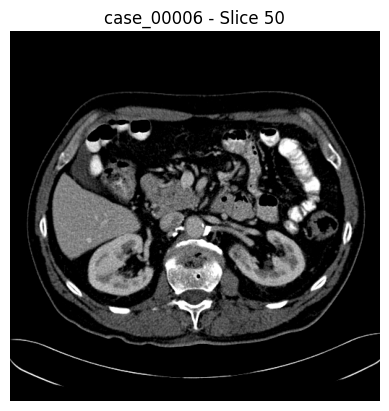

In [11]:
import matplotlib.pyplot as plt

def visualize_windowed_image(case_name, output_path, slice_index):
    """
    Visualize a slice from a windowed NIfTI file.

    Args:
    - case_name (str): The name of the case to visualize.
    - output_path (str): Path to the folder containing windowed NIfTI files.
    - slice_index (int): The slice to visualize.
    """
    windowed_file = os.path.join(output_path, f"{case_name}_windowed.nii.gz")

    if not os.path.exists(windowed_file):
        print(f"Windowed file not found for {case_name}")
        return

    windowed_obj = nib.load(windowed_file)
    windowed_data = windowed_obj.get_fdata()

    # Plot the slice
    plt.imshow(windowed_data[slice_index, :, :], cmap='gray')
    plt.title(f"{case_name} - Slice {slice_index}")
    plt.axis('off')
    plt.show()

# Visualize a specific case and slice
visualize_windowed_image("case_00006", output_path, slice_index=50)


In [12]:
import os
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt

# Define the input and output paths
windowed_images_path = "D:/kits23/windowed_images"  # Folder where windowed images are saved
visualization_output_path = "D:/kits23/windowed_visualizations"  # Folder to save visualizations
progress_file = "windowed_visualization.txt"  # Updated progress file name

os.makedirs(visualization_output_path, exist_ok=True)  # Create the folder if it doesn't exist

# Function to load the progress from the file
def load_progress(progress_file):
    if os.path.exists(progress_file):
        with open(progress_file, "r") as f:
            return set(line.strip() for line in f.readlines())
    return set()

# Function to save progress to the file
def save_progress(progress_file, case_folder):
    with open(progress_file, "a") as f:
        f.write(case_folder + "\n")

# Function to visualize and save a windowed image
def visualize_and_save_windowed_image(case_folder, windowed_images_path, slice_index, visualization_output_path):
    """
    Visualize and save the windowed image for a specific case and slice.

    Args:
    - case_folder (str): The folder name of the current case.
    - windowed_images_path (str): Path to the folder with windowed images.
    - slice_index (int): The slice index to visualize.
    - visualization_output_path (str): Path to save the visualization images.
    """
    windowed_file = os.path.join(windowed_images_path, f"{case_folder}_windowed.nii.gz")

    # Load the windowed imaging data
    windowed_obj = nib.load(windowed_file)
    windowed_data = windowed_obj.get_fdata()

    # Check if the slice index is within bounds
    max_slices = windowed_data.shape[0]  # Get the number of slices in the first dimension
    if slice_index >= max_slices:
        print(f"Warning: slice_index {slice_index} is out of bounds for case {case_folder}. Adjusting to max slice index {max_slices-1}.")
        slice_index = max_slices - 1  # Adjust to the last valid slice index

    # Create a visualization for the windowed slice
    plt.figure(figsize=(6, 6))
    plt.imshow(windowed_data[slice_index, :, :], cmap='gray')
    plt.title(f"Windowed Slice for {case_folder} - Slice {slice_index}", fontsize=14)
    plt.axis('off')

    # Save the visualization as a PNG file
    output_file = os.path.join(visualization_output_path, f"{case_folder}_windowed_slice_{slice_index}.png")
    plt.savefig(output_file, dpi=300)
    plt.close()  # Close the plot to free memory

    print(f"Saved windowed slice visualization for {case_folder}, Slice {slice_index}.")

# Choose a slice to visualize
slice_index = 50  # Adjust this index as needed

# Load progress
completed_cases = load_progress(progress_file)

# Process and save visualizations for each case
for case_folder in sorted(os.listdir(windowed_images_path)):
    if case_folder.endswith("_windowed.nii.gz") and case_folder not in completed_cases:  # Ensure we only process files not processed yet
        case_name = case_folder.replace("_windowed.nii.gz", "")
        visualize_and_save_windowed_image(case_name, windowed_images_path, slice_index, visualization_output_path)
        save_progress(progress_file, case_name)  # Save progress after each case


Saved windowed slice visualization for case_00000, Slice 50.
Saved windowed slice visualization for case_00001, Slice 50.
Saved windowed slice visualization for case_00002, Slice 50.
Saved windowed slice visualization for case_00003, Slice 50.
Saved windowed slice visualization for case_00004, Slice 50.
Saved windowed slice visualization for case_00005, Slice 50.
Saved windowed slice visualization for case_00006, Slice 50.
Saved windowed slice visualization for case_00007, Slice 50.
Saved windowed slice visualization for case_00008, Slice 50.
Saved windowed slice visualization for case_00009, Slice 50.
Saved windowed slice visualization for case_00010, Slice 49.
Saved windowed slice visualization for case_00011, Slice 50.
Saved windowed slice visualization for case_00012, Slice 50.
Saved windowed slice visualization for case_00013, Slice 50.
Saved windowed slice visualization for case_00014, Slice 50.
Saved windowed slice visualization for case_00015, Slice 50.
Saved windowed slice vis

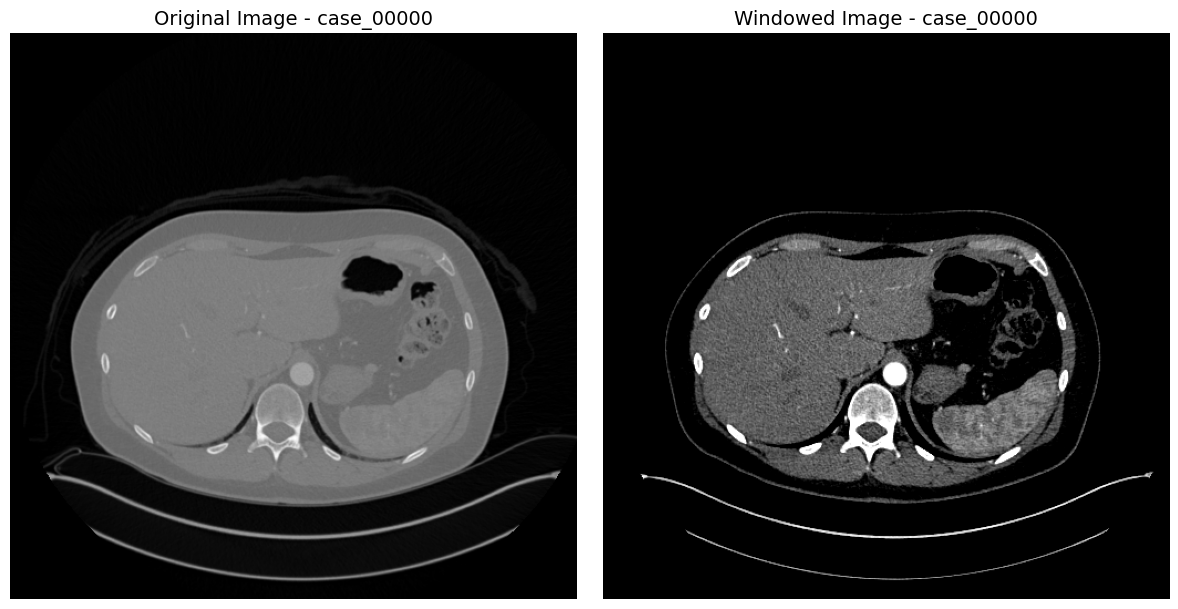

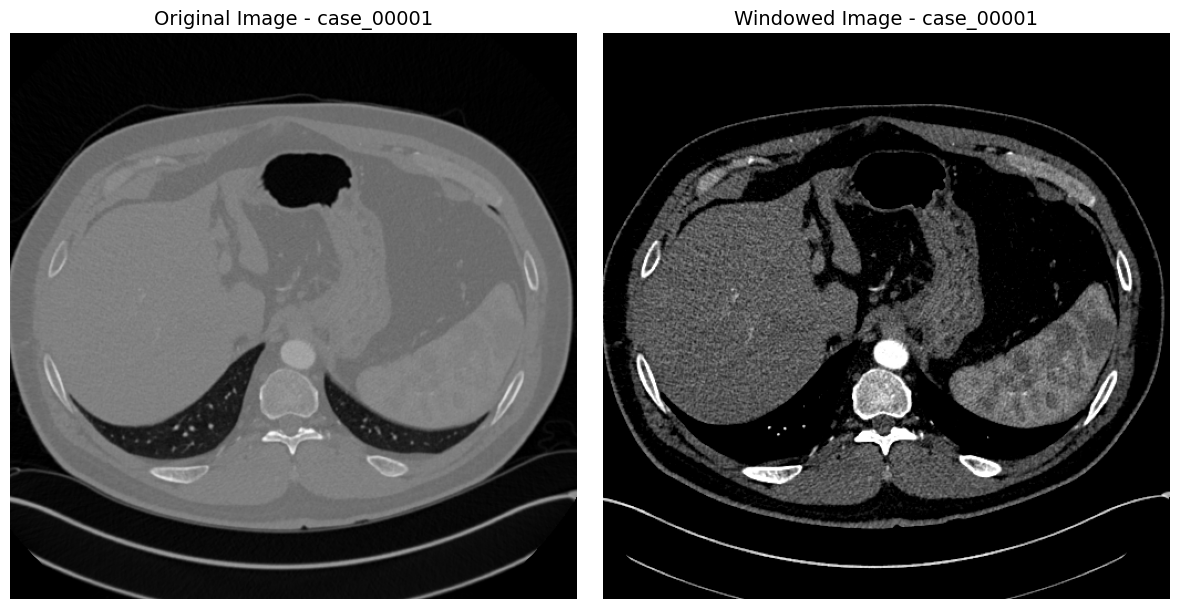

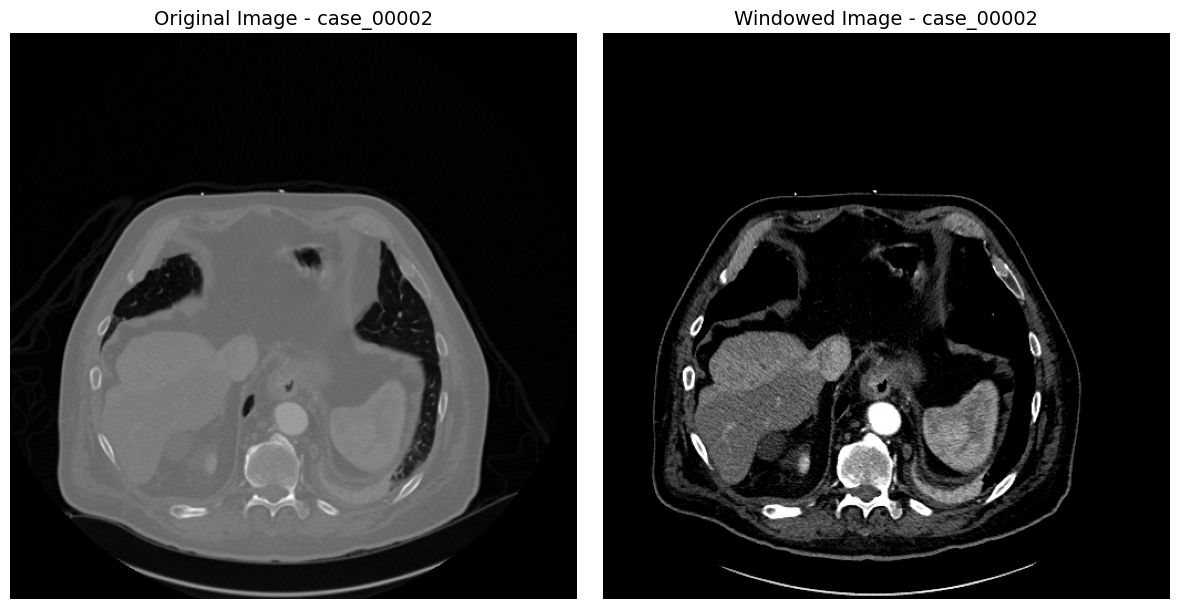

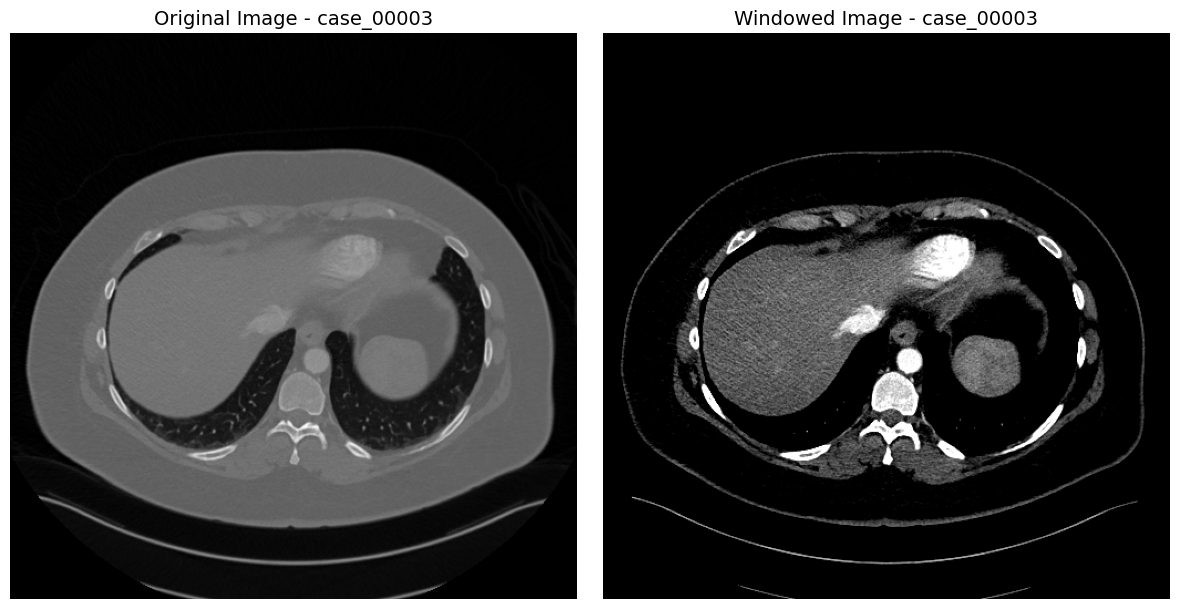

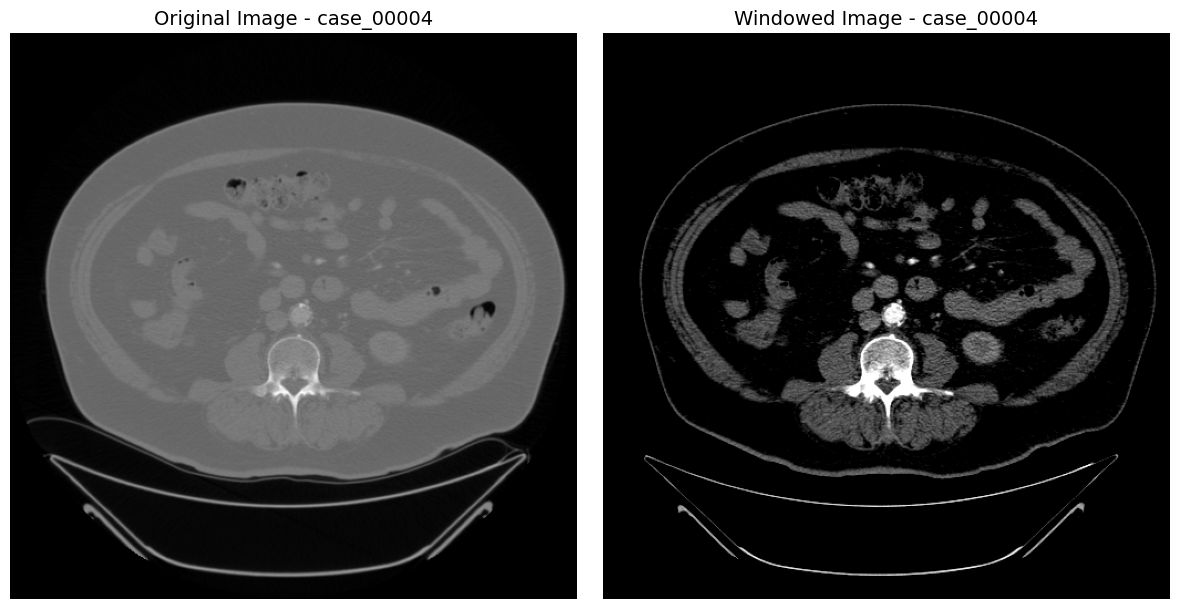

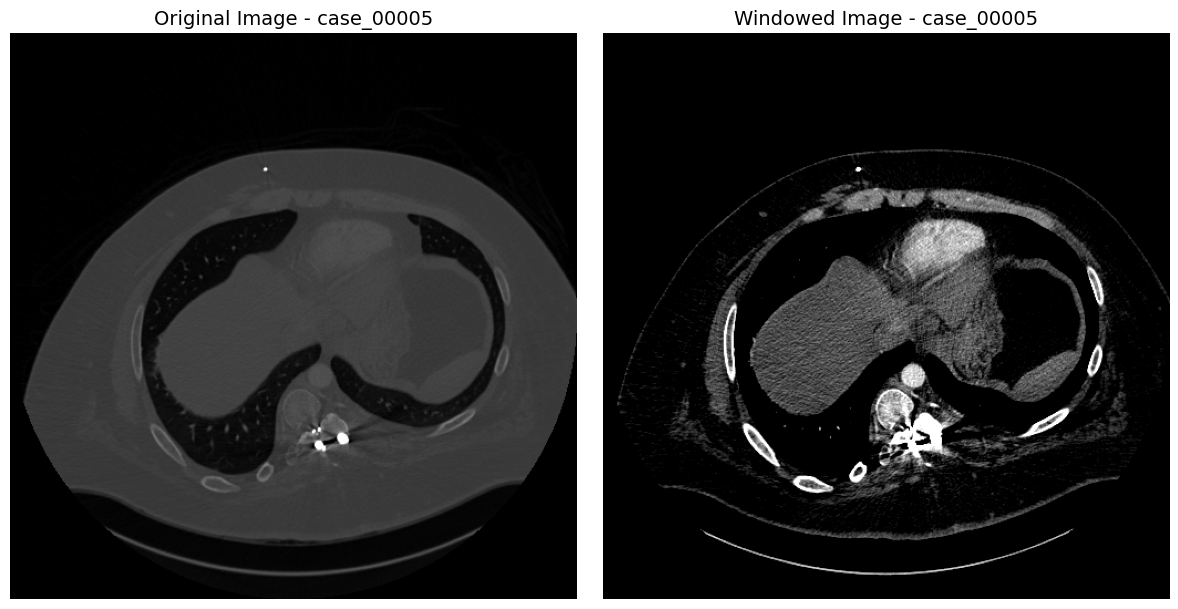

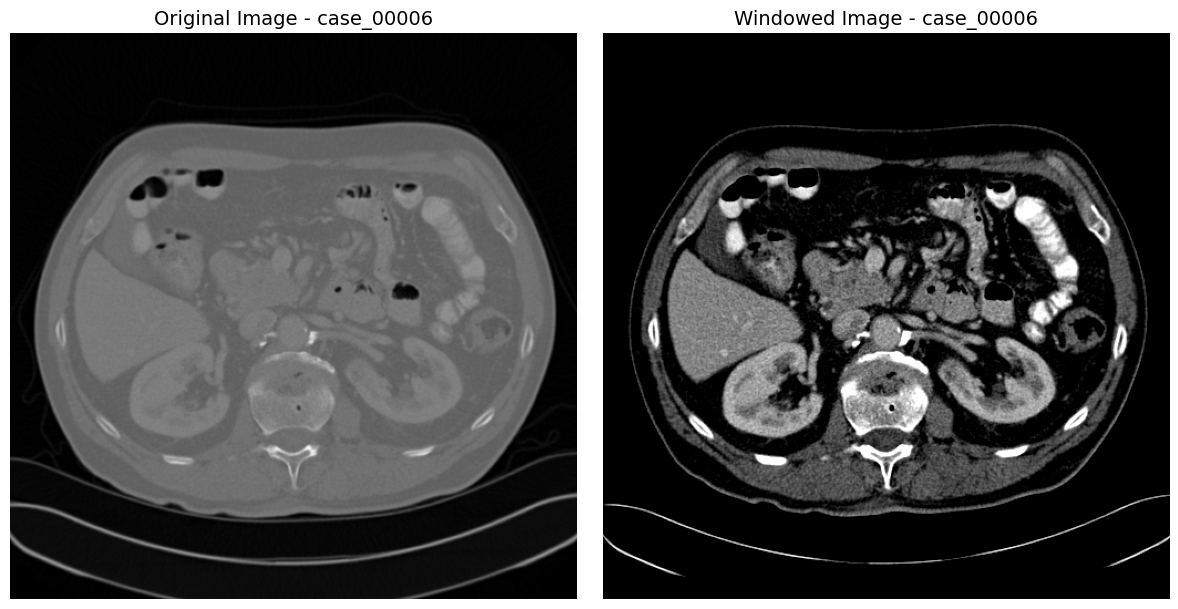

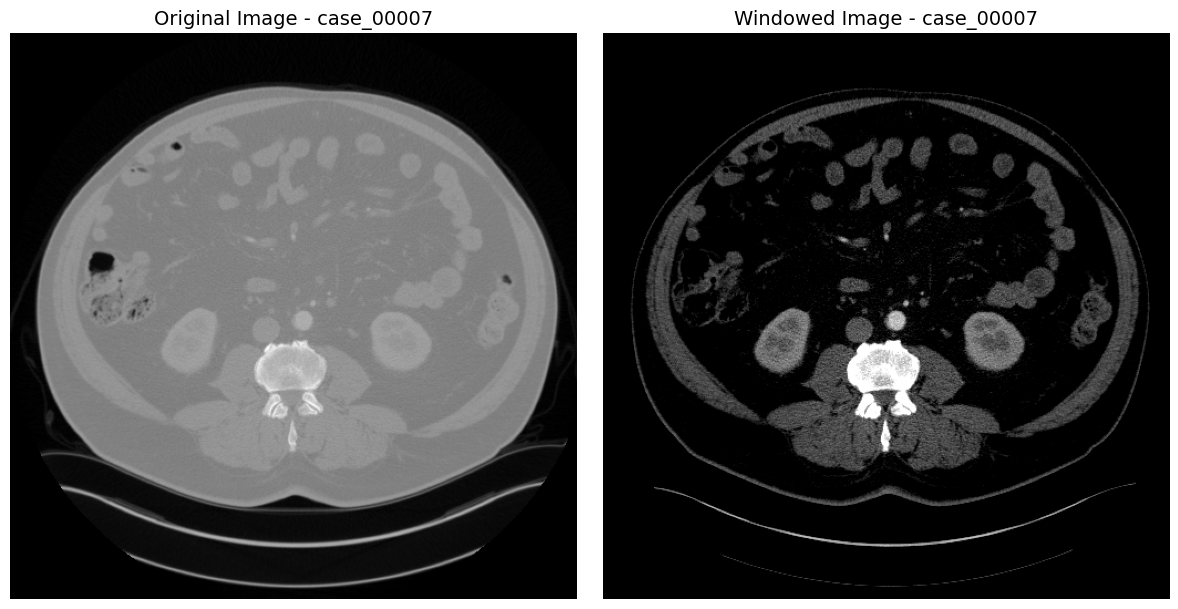

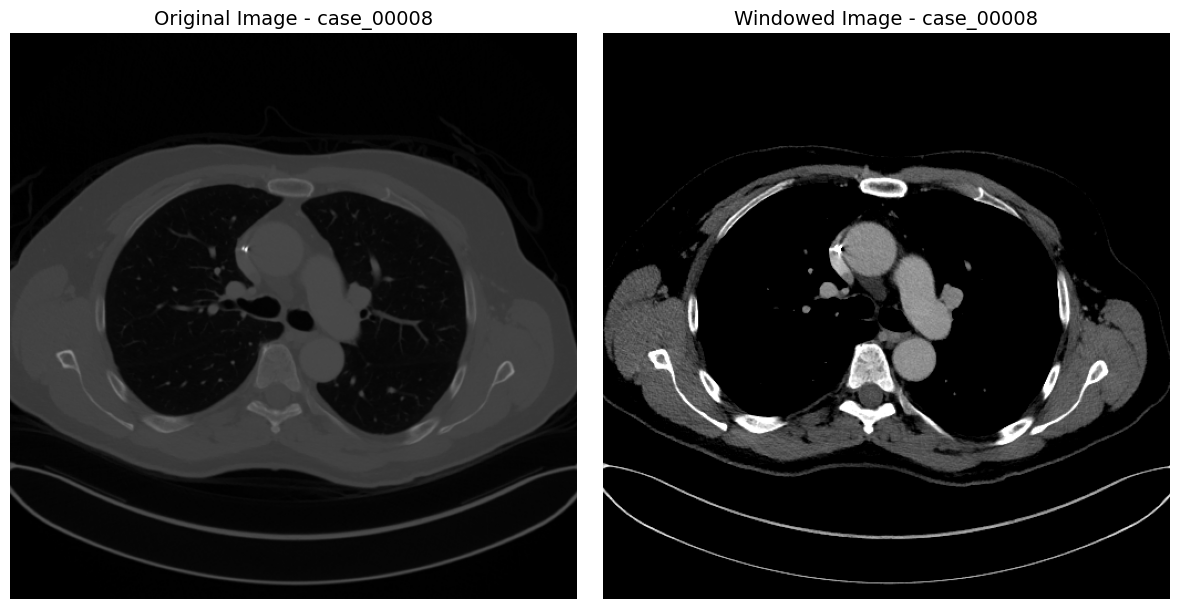

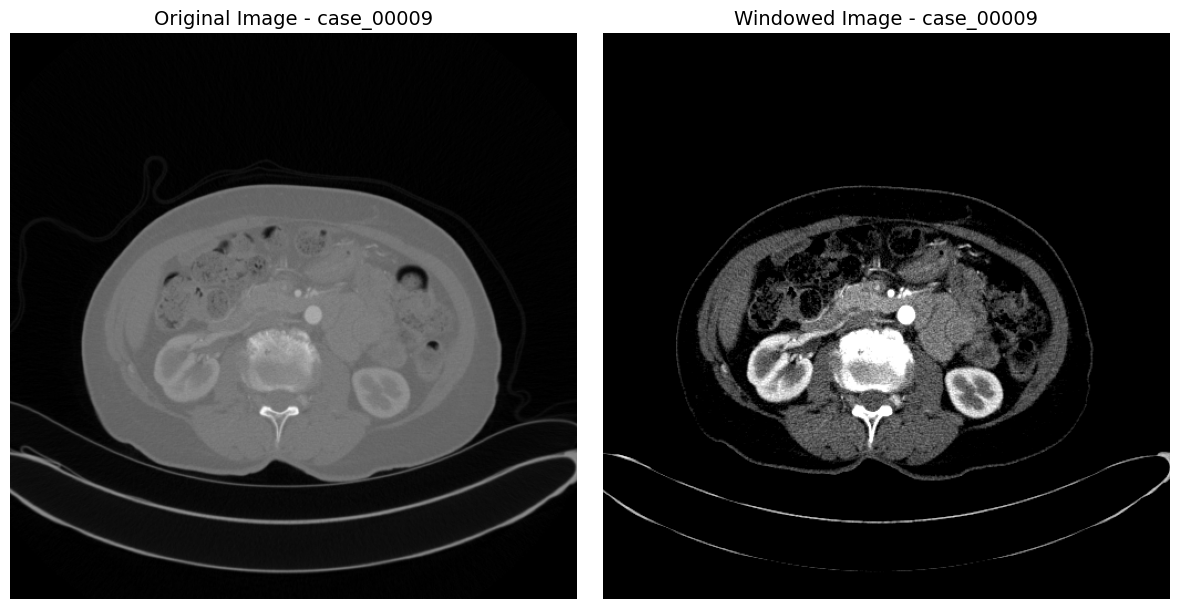

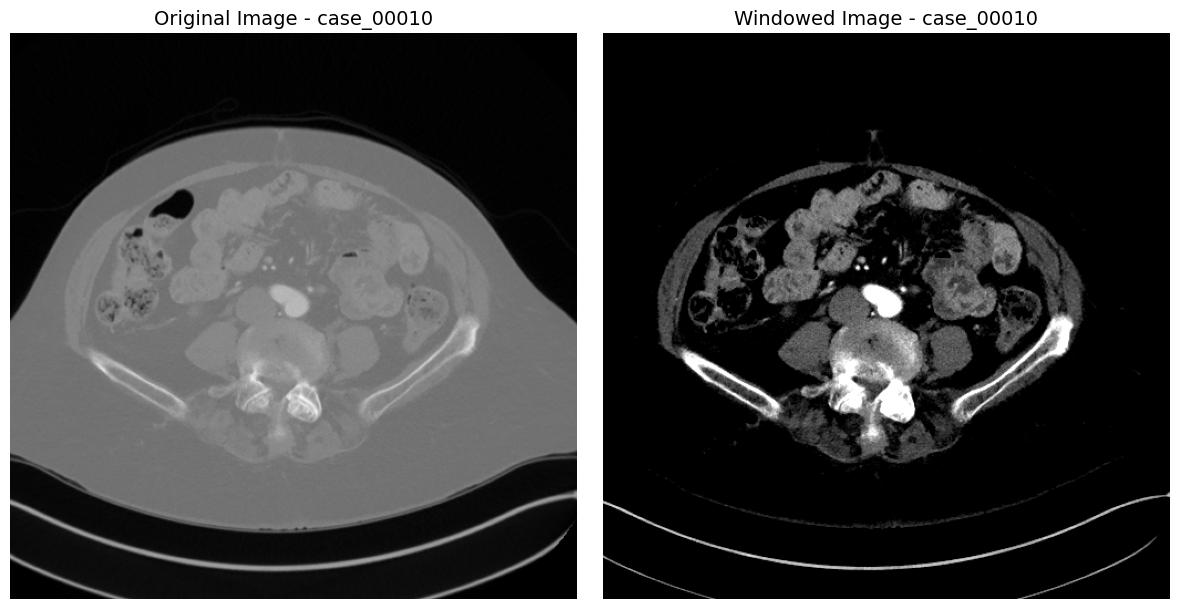

In [13]:
import os
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt

# Define the input paths
original_images_path = "D:/kits23/dataset"  # Folder where original images are saved
windowed_images_path = "D:/kits23/windowed_images"  # Folder where windowed images are saved

# Function to visualize and compare the original and windowed images
def visualize_and_compare_images(case_folder, original_images_path, windowed_images_path, slice_index):
    """
    Visualize and compare the original and windowed images for a specific case and slice.

    Args:
    - case_folder (str): The folder name of the current case.
    - original_images_path (str): Path to the folder with original images.
    - windowed_images_path (str): Path to the folder with windowed images.
    - slice_index (int): The slice index to visualize.
    """
    # Paths to the original and windowed imaging data
    original_file = os.path.join(original_images_path, case_folder, "imaging.nii.gz")
    windowed_file = os.path.join(windowed_images_path, f"{case_folder}_windowed.nii.gz")

    # Load the original and windowed imaging data
    original_obj = nib.load(original_file)
    original_data = original_obj.get_fdata()

    windowed_obj = nib.load(windowed_file)
    windowed_data = windowed_obj.get_fdata()

    # Check if the slice index is within bounds
    max_slices = original_data.shape[0]  # Get the number of slices in the first dimension
    if slice_index >= max_slices:
        print(f"Warning: slice_index {slice_index} is out of bounds for case {case_folder}. Adjusting to max slice index {max_slices-1}.")
        slice_index = max_slices - 1  # Adjust to the last valid slice index

    # Create a horizontal layout for the images
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))  

    # Plot the original image
    axes[0].imshow(original_data[slice_index, :, :], cmap='gray')
    axes[0].set_title(f"Original Image - {case_folder}", fontsize=14)
    axes[0].axis('off')

    # Plot the windowed image
    axes[1].imshow(windowed_data[slice_index, :, :], cmap='gray')
    axes[1].set_title(f"Windowed Image - {case_folder}", fontsize=14)
    axes[1].axis('off')

    # Adjust layout to avoid overlap
    plt.tight_layout()

    # Display the comparison
    plt.show()

# Choose a slice to visualize
slice_index = 50  # Adjust this index as needed

# Visualize the comparisons for the first 11 cases (from case_00000 to case_00010)
for case_num in range(11):
    case_folder = f"case_{case_num:05d}"  # Create case folder name, e.g., case_00000
    visualize_and_compare_images(case_folder, original_images_path, windowed_images_path, slice_index)
